In [2]:
#imported libaries
import os
import numpy as np
import pandas as  pd
import matplotlib as plt
%matplotlib inline

<h1>The dataset has five columns with date, open, high, low, close and volums rows</h1>

In [3]:
import pandas as pd
dataset_train = pd.read_csv("./Google_Stock_Price_Train.csv")
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


<h1>Check for null values</h1>

In [4]:
dataset_train.isnull()

,Date,Open,High,Low,Close,Volume
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1253,False,False,False,False,False,False
1254,False,False,False,False,False,False
1255,False,False,False,False,False,False
1256,False,False,False,False,False,False


<h1> Fields to use in the dataset</h1>

In [31]:
dataset_train['Date']


0         1/3/2012
1         1/4/2012
2         1/5/2012
3         1/6/2012
4         1/9/2012
           ...    
1253    12/23/2016
1254    12/27/2016
1255    12/28/2016
1256    12/29/2016
1257    12/30/2016
Name: Date, Length: 1258, dtype: object

In [32]:
dataset_train['High']

0       332.83
1       333.87
2       330.75
3       328.77
4       322.29
         ...  
1253    792.74
1254    797.86
1255    794.23
1256    785.93
1257    782.78
Name: High, Length: 1258, dtype: float64

In [33]:
dataset_train['Low']

0       324.97
1       329.08
2       326.89
3       323.68
4       309.46
         ...  
1253    787.28
1254    787.66
1255    783.20
1256    778.92
1257    770.41
Name: Low, Length: 1258, dtype: float64

In [34]:
dataset_train['Close']

0       663.59
1       666.45
2       657.21
3       648.24
4       620.76
         ...  
1253    789.91
1254    791.55
1255    785.05
1256    782.79
1257    771.82
Name: Close, Length: 1258, dtype: object

In [35]:
dataset_train['Volume']

0        7,380,500
1        5,749,400
2        6,590,300
3        5,405,900
4       11,688,800
           ...    
1253       623,400
1254       789,100
1255     1,153,800
1256       744,300
1257     1,770,000
Name: Volume, Length: 1258, dtype: object

<h1>The data type is object and float64 </h1>

In [5]:
dataset_train.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close      object
Volume     object
dtype: object

<h1>Google stock colums to train the model</h1>

In [6]:
training_colums = dataset_train.iloc[:,1:2].values
print(training_colums)
print(training_colums.shape)



[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]
(1258, 1)


<h1>Data normalization</h1>

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaler = MinMaxScaler(feature_range=(0,1))
scaled_training_colums = scaler.fit_transform(training_colums)
scaled_training_colums

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

<h1>Design X_train and Y_train</h1>

In [8]:
x_train = []
y_train = []

for index in range(60,1258):
    x_train.append(scaled_training_colums[index-60:index, 0])
    y_train.append(scaled_training_colums[index, 0])
x_train = np.array(x_train)
y_train = np.array(y_train)

print(x_train.shape)
print(y_train.shape)

(1198, 60)
(1198,)


<h1>Reshape data </h1>

In [9]:
X_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
X_train.shape

(1198, 60, 1)

<h1> Libaries adding LSTM</h1>

In [10]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

<h1> Use LSTM to train short and long term memory and deep learning purposes</h1>

In [13]:
regression = Sequential()

regression.add(LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1], 1)))
regression.add(Dropout(0.2))

regression.add(LSTM(units =50, return_sequences=True))
regression.add(Dropout(0.2))

regression.add(LSTM(units =50, return_sequences=True))
regression.add(Dropout(0.2))

regression.add(LSTM(units=50))
regression.add(Dropout(0.2))
regression.add(Dense(units=1))


<h1>Fit the model</h1>

In [ ]:
regression.compile(optimizer ='adam', loss='mean_squared_error')
regression.fit(x_train, y_train, epochs=100, batch_size=32)

<h1>Extract the stock price</h1>

In [14]:
dataset_test = pd.read_csv('./Google_Stock_Price_Test.csv')
stock_price = dataset_test.iloc[:,1:2].values
stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

<h1>Get the input for the model</h1>

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test)-60:].values

inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

X_test = []

for index in range(60, 80):
    X_test.append(inputs[index-60:index, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test.shape[0], X_test.shape[1], 1)

<h1>Predict the value of stock price for January 2017

In [16]:
predict_stock_price = regression.predict(X_test)
predict_stock_price = scaler.inverse_transform(predict_stock_price)


1/1 [==============================] - 2s 2s/step


<h1> Plot a graph representation of prediction of the stock price</h1>

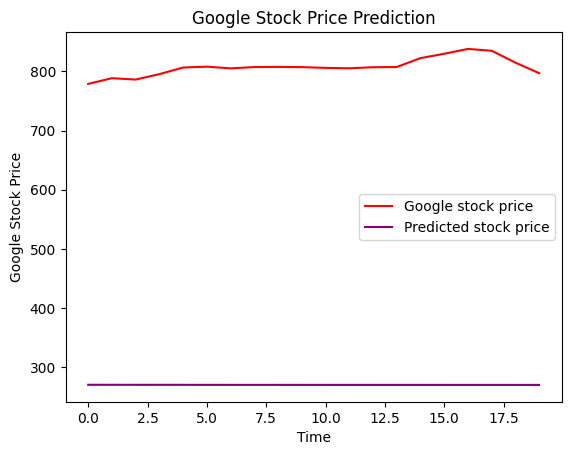

In [17]:
import matplotlib.pyplot as plt

plt.plot(stock_price , color = 'red', label = 'Google stock price')
plt.plot(predict_stock_price, color = 'purple', label = 'Predicted stock price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()

<p>The model can now predict the stock price as well as the actual price</p>

<h1> In conclusion we see how training a model can make prediction for the stock market.
We also learn how the stock market works using machine learning</h1>